In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import dtale

In [6]:
from olist.data import Olist
data = Olist().get_data()

In [63]:
from olist.meth import total_olist_profit, \
                        it_cost, profit_including_itcost, drop_a_nb_of_rows, drop_by_profit, \
                        profit_after_droping, nps_per_seller, impact_if_never, drop_by_nps, \
                        it_cost_n, info_df, comparative, allprod_df

In [23]:
from olist.seller import Seller
seller = Seller().get_training_data()

In [28]:
from olist.order import Order
order = Order().get_training_data()

# CEO-Request Challenge

## Problem statement (summarized)

How should Olist improve it's profit margin, given that it has
- revenues per sellers per months
- revenues per orders
- reputation costs (estimated) per bad reviews
- operational costs of IT system that grows with number of orders, but not linearly (scale effects)

We advise you to start with the following analysis

🕵🏻 **Should Olist remove underperforming sellers from its marketplace ?**

To analyse the impact of removing the worse sellers from Olist's marketplace, we will perform a what-if analysis: What would have happened if Olist had never accepted these sellers in the first place? (granted, it's hard to know in advance who is a good seller, but let's start with this and iterate later).

1️⃣ Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` it brings
- the `costs` associated with all its bad reviews
- the resulting `profits` (revenues - costs)
- the number of `orders` (it will impact the overall IT costs)


2️⃣ We can then:
- sort sellers by increasing profits for Olist
- for each number of sellers to remove, compute the financial impact it would have made if they had never been accepted on the platform. 
- we may find an optimal number of sellers to remove that maximizes Olist's profit margin

👉 Write down a detailed strategy (step by step) to create the DataFrame you need for the first step.

💡Think about how to re-use or update the logic you've already coded in your 🗂 `olist` package

<details>
    <summary>- <i>Hints</i> -</summary>


Starting from your current `seller().get_training_data()` DataFrame, can you easily transform it to compute:
- Olist's positive `revenue_per_seller`? 
- Olist's `cost_of_bad_reviews`?

⚠️ Do no start from scratch ! Investigate your source code in `seller.py` : 

</details>


colonnes nécessaires : order_id, seller_id, review_score, order_purchase_timestamp

## Your turn!

🧺 Keep this notebook tidy! 

📅 🗣 📊 You will present your insights to Olist's CEO next time, after the `Communicate your Data Analysis insights` day!

In [141]:
seller = Seller().get_training_data()
seller_profit = df_w_profit(seller)

In [142]:
seller_nps = nps_per_seller(seller_profit)

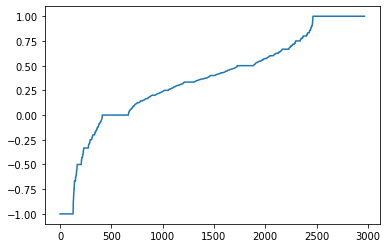

In [149]:
plt.plot(seller_nps.sort_values('nps').nps.reset_index()['nps'])

In [160]:
X = np.linspace(-1.1,-0.7,6)
Y = [profit_including_itcost(drop_by_nps(seller_profit,x)) for x in X]

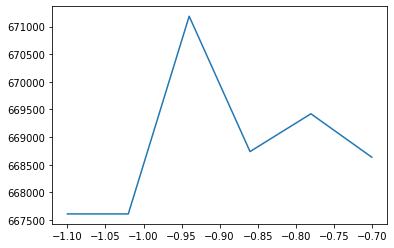

In [161]:
plt.plot(X,Y)

In [163]:
profit_including_itcost(df_w_profit(seller))

667608.4440000001

In [177]:
from olist.product import Product
product = Product().get_training_data()

In [188]:
product.head(20)

,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category,wait_time,price,share_of_one_stars,share_of_five_stars,review_score,n_orders,quantity,sales,review_cost
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,3.017639,10.910000,0.000000,1.000000,5.000000,1,1,10.91,0
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,10.275272,16.900000,0.000000,0.500000,3.500000,2,2,33.80,0
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,13.933686,325.627273,0.200000,0.400000,3.700000,10,11,3581.90,0
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery,21.219062,399.900000,0.000000,0.000000,2.000000,1,1,399.90,50
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery,8.965984,137.900000,0.000000,1.000000,5.000000,1,1,137.90,0
5,828fe032935d7c1901682e5b6cc076c2,48.0,1063.0,2.0,600.0,20.0,20.0,20.0,perfumery,11.088148,99.800000,0.000000,1.000000,5.000000,1,1,99.80,0
6,bbaef2eadf31fe3ea6702077398be06c,45.0,1003.0,2.0,400.0,18.0,11.0,11.0,perfumery,13.769598,56.990000,0.163934,0.491803,3.770492,60,65,3704.35,0
7,cd7701670288642f7be9437dec9034c1,48.0,606.0,2.0,400.0,16.0,20.0,15.0,perfumery,11.862535,99.990000,0.000000,0.000000,4.000000,1,1,99.99,0
8,dc582e9ac5036846acfeeb3093b17aa7,50.0,749.0,1.0,1300.0,22.0,14.0,14.0,perfumery,7.575984,104.900000,0.000000,1.000000,5.000000,1,1,104.90,0
9,1f64ec386a6be322e71596931f5d2377,46.0,499.0,1.0,200.0,16.0,22.0,11.0,perfumery,7.899572,11.700000,0.000000,1.000000,5.000000,1,1,11.70,0


In [187]:
df_cat = product.groupby('category').sum()[['review_cost', 'sales', 'n_orders']]
df_cat.sort_values('review_cost', inplace = True)
df_cat['profit']=df_cat['sales']-df_cat['review_cost']
df_cat['profit_per_order'] = df_cat['profit']/df_cat['n_orders']
df_cat.sort_values('profit')

,review_cost,sales,n_orders,profit,profit_per_order
category,,,,,
security_and_services,100,283.29,2,183.29,91.645000
fashion_childrens_clothes,0,519.95,7,519.95,74.278571
cds_dvds_musicals,0,730.00,12,730.00,60.833333
home_comfort_2,0,760.27,24,760.27,31.677917
flowers,40,1110.04,29,1070.04,36.897931
...,...,...,...,...,...
computers_accessories,19370,899465.74,6840,880095.74,128.668968
sports_leisure,28040,976548.15,7798,948508.15,121.634797
bed_bath_table,41360,1030834.98,10101,989474.98,97.958121


<BarContainer object of 71 artists>

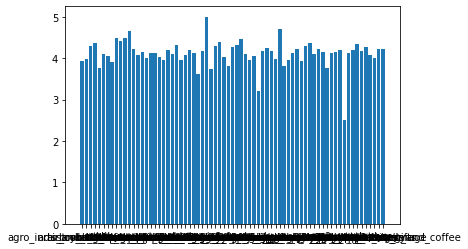

In [189]:
data['order_items']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


## Tri sur les produits

In [62]:
 def allprod_df():
    def cost_review(v):
        if v == 1:
            return 100
        elif v == 2:
            return 50
        elif v == 3:
            return 40
        return 0
    allprod = data['order_items'].merge(data['products'], on="product_id").merge(data['orders'], on = 'order_id') \
                        .merge(data['order_reviews'], on="order_id").drop_duplicates(['order_id','product_id']) \
                        [['order_id', 'product_id', 'product_category_name', 'review_score','price']]


    allprod_count = allprod.groupby('product_category_name', as_index = False).count()[['review_score','product_category_name']]
    allprod_mean = allprod.groupby('product_category_name', as_index = False).mean()[['review_score','product_category_name']]
    allprod = allprod_count.merge(allprod_mean, on ="product_category_name")
    allprod.columns = ['Nb',"Category","Score_review"]
    allprod.sort_values('Score_review').head(50)

    allprod['indice'] = allprod['Score_review']*allprod['Nb']/allprod['Nb'].sum()
    mean_r = allprod['indice'].sum()

    allprod['diff_mean']=allprod['Score_review']-mean_r
    allprod = allprod.sort_values('diff_mean').reset_index()
    return allprod


,index,Nb,Category,Score_review,indice,diff_mean
0,67,2,seguros_e_servicos,2.500000,0.000050,-1.579487
1,60,8,pc_gamer,3.125000,0.000250,-0.954487
2,65,14,portateis_cozinha_e_preparadores_de_alimentos,3.428571,0.000479,-0.650915
3,55,1293,moveis_escritorio,3.596288,0.046416,-0.483199
4,38,122,fashion_roupa_masculina,3.639344,0.004432,-0.440143
5,36,40,fashion_roupa_feminina,3.675000,0.001467,-0.404487
6,42,27,fraldas_higiene,3.740741,0.001008,-0.338746
7,52,38,moveis_colchao_e_estofado,3.815789,0.001447,-0.263697
8,15,23,casa_conforto_2,3.826087,0.000878,-0.253400
9,7,347,audio,3.832853,0.013276,-0.246634


In [11]:
allprod['olist_tax'] = 0.1 * allprod['price']

In [12]:
allprod['profit'] = allprod['olist_tax'] - allprod['cost_review']

In [14]:
allprod['price'].sum()

12628806.799999999

In [302]:
all_prod = allprod[['product_id', 'cost_review', 'price', 'olist_tax', 'profit']] \
        .sort_values('profit').reset_index()

In [1]:
bad_product = all_prod[all_prod['profit']<0]
good_product = all_prod[all_prod['profit']>0]

NameError: name 'all_prod' is not defined

In [305]:
bad_product.profit.sum()

-1069366.995

In [306]:
data = Olist().get_data()
def cost_review(v):
    if v == 1:
        return 100
    elif v == 2:
        return 50
    elif v == 3:
        return 40
    return 0

ord_sel = data['orders'].merge(data['order_items'], on = "order_id")[['seller_id', 'order_id']]
ord_sel.drop_duplicates(keep = 'first', inplace = True)
ord_sel = ord_sel.merge(data['order_reviews'], on = 'order_id')[['seller_id', "review_score",'order_id']]

ord_sel['review_cost']=ord_sel['review_score'].apply(cost_review)

In [307]:
ord_sel

,seller_id,review_score,order_id,review_cost
0,3504c0cb71d7fa48d967e0e4c94d59d9,4,e481f51cbdc54678b7cc49136f2d6af7,0
1,289cdb325fb7e7f891c38608bf9e0962,4,53cdb2fc8bc7dce0b6741e2150273451,0
2,4869f7a5dfa277a7dca6462dcf3b52b2,5,47770eb9100c2d0c44946d9cf07ec65d,0
3,66922902710d126a0e7d26b0e3805106,5,949d5b44dbf5de918fe9c16f97b45f8a,0
4,2c9e548be18521d1c43cde1c582c6de8,5,ad21c59c0840e6cb83a9ceb5573f8159,0
...,...,...,...,...
99804,e24fc9fcd865784fb25705606fe3dfe7,5,9c5dedf39a927c1b2549525ed64a053c,0
99805,1f9ab4708f3056ede07124aad39a2554,4,63943bddc261676b46f01ca7ac2f7bd8,0
99806,d50d79cb34e38265a8649c383dcffd48,5,83c1379a015df1e13d02aae0204711ab,0
99807,a1043bafd471dff536d0c462352beb48,2,11c177c8e97725db2631073c19f07b62,50


In [308]:
ord_sel = ord_sel[["seller_id", "review_cost"]].groupby("seller_id", as_index=False).sum()

In [309]:
ord_sel

,seller_id,review_cost
0,0015a82c2db000af6aaaf3ae2ecb0532,100
1,001cca7ae9ae17fb1caed9dfb1094831,3560
2,001e6ad469a905060d959994f1b41e4f,100
3,002100f778ceb8431b7a1020ff7ab48f,1110
4,003554e2dce176b5555353e4f3555ac8,0
...,...,...
3085,ffcfefa19b08742c5d315f2791395ee5,100
3086,ffdd9f82b9a447f6f8d4b91554cc7dd3,190
3087,ffeee66ac5d5a62fe688b9d26f83f534,200
3088,fffd5413c0700ac820c7069d66d98c89,1360


In [314]:
seller = Seller().get_training_data()
seller.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_one_stars,share_of_five_stars,review_cost,olist_revenue,olist_profit
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,3.000000,0.333333,0.333333,140,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,4.560976,0.048780,0.731707,240,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,5.000000,0.000000,1.000000,0,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000,79.99,5.000000,0.000000,1.000000,0,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000,167.99,1.000000,1.000000,0.000000,100,16.799,-83.201


In [315]:
it_cost(seller)

500000.0

In [316]:
len(data['orders'])

99441

## Impact sur les sellers

In [31]:
plt.plot(x='distance_seller_customer',y='review_score', data = order)

TypeError: plot got an unexpected keyword argument 'x'

In [22]:
def average_nps(df):
    return (df['nps']*df['n_orders']).sum()/df['n_orders'].sum()

In [338]:
info_df(seller)

AttributeError: 'builtin_function_or_method' object has no attribute 'lower'

In [349]:
info_df(seller, "Initiale")

,Initiale
Nb de commande,99841.00
Chiffre d'affaire,2785818.00
Cout des reviews,1618210.00
Cout IT,500000.00
Profit Olist,1167608.00
Olist NPS,0.33


In [356]:
info_df(seller[seller['review_cost']<10000], "Vendeurs déficitaires exclus")

,Vendeurs déficitaires exclus
Nb de commande,80511.00
Chiffre d'affaire,2566725.00
Cout des reviews,1268600.00
Cout IT,448997.00
Profit Olist,849128.00
Olist NPS,0.35


In [348]:
"""def plot_evol_df(df, crit):
    dico_crit = {"nps":[0,1], "profit":[500000,1000000]}
    min = dico_crit['crit'][0]
    max = dico_crit['crit'][0]
    X = linspace(min, max, 10)
    if crit=="nps":
        Y = [average_nps(df[df['nps']>x]) for x in X]
    else :
        Y = [(df[df['olist']>x]) for x in X]"""

2785818.444

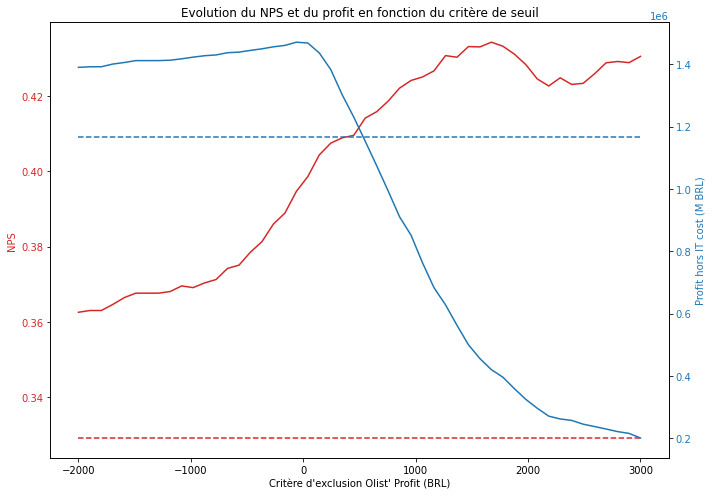

In [426]:
df = seller
X = np.linspace(-2000, 3000, 50)
crit = 'olist_profit'
Y_nps = [average_nps(df[df['olist_profit']>x]) for x in X]
Y_actual_nps = [average_nps(df) for x in X]
Y_profit = [total_olist_profit(df[df['olist_profit']>x]) for x in X]
Y_actual_profit = [df['olist_profit'].sum() for x in X]


fig, ax1 = plt.subplots()
plt.title("Evolution du NPS et du profit en fonction du critère de seuil")
fig.set_figheight(7)
fig.set_figwidth(10)

color = 'tab:red'
ax1.set_xlabel("Critère d'exclusion Olist' Profit (BRL)")
ax1.set_ylabel('NPS', color=color)
ax1.plot(X, Y_nps, color=color)
ax1.plot(X, Y_actual_nps, '--', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Profit hors IT cost (M BRL)', color=color)  # we already handled the x-label with ax1
ax2.plot(X, Y_profit, color=color)
ax2.plot(X, Y_actual_profit, '--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [372]:
#df[df['review_cost']<0]
df.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_one_stars,share_of_five_stars,review_cost,olist_revenue,olist_profit,nps
769,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,0.0,9.539486,2017-02-17 07:45:11,2018-08-29 09:25:12,18.0,1854,2033,1.096548,123304.83,3.909406,0.132178,0.506931,35290,13770.483,-21519.517,0.220297
2358,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,0.0,14.416471,2017-01-08 09:45:12,2018-08-27 11:04:18,20.0,1806,1987,1.100221,200472.92,3.803931,0.148185,0.477319,39400,21647.292,-17752.708,0.149698
1357,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,0.0,11.539753,2017-02-02 17:10:21,2018-08-28 03:45:15,19.0,1706,1775,1.040445,104288.42,4.069575,0.118719,0.581447,29530,11948.842,-17581.158,0.338487
945,ea8482cd71df3c1969d7b9473ff13abc,sao paulo,SP,0.0,13.315562,2017-08-16 15:15:26,2018-08-25 02:45:21,12.0,1146,1203,1.049738,37177.52,3.953216,0.124478,0.517962,20220,4677.752,-15542.248,0.243943
315,8b321bb669392f5163d04c59e235e066,sao paulo,SP,0.0,12.616899,2017-10-27 16:31:30,2018-08-21 17:08:38,10.0,943,1018,1.079533,17535.69,3.995069,0.130178,0.546351,15440,2553.569,-12886.431,0.296844


In [420]:
comparative(seller[seller['olist_profit']>0])

,Initiale,Solution,Evolution
Nb de commande,99841.00,60377.0,-40.0
Chiffre d'affaire,2785818.00,2311581.0,-17.0
Cout des reviews,1618210.00,837510.0,-48.0
Cout IT,500000.00,388822.0,-22.0
Profit Olist,667608.00,1085249.0,63.0
Olist NPS,0.33,0.4,21.0


In [423]:
comparative(seller[seller['olist_profit']>500])

,Initiale,Solution,Evolution
Nb de commande,99841.00,43266.00,-57.0
Chiffre d'affaire,2785818.00,1764649.00,-37.0
Cout des reviews,1618210.00,575920.00,-64.0
Cout IT,500000.00,329146.00,-34.0
Profit Olist,667608.00,859583.00,29.0
Olist NPS,0.33,0.41,24.0


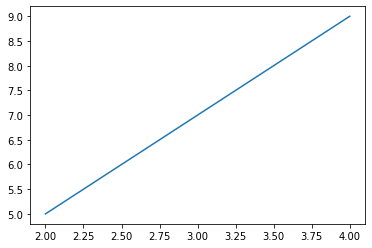

In [427]:
plt.plot([2,4],[5,9])
plt.show()